In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline


from models.wimp import SIWIMP
from models.wimp import SIWIMP_Helm
from models.migdal import MIGDAL
from models.inelastic import SIInel
from detectors.dama import DAMA
from veldists import VelDist
from constants import *

In [2]:
## Step 1
Det = DAMA()
Model = MIGDAL()
Dist = VelDist("avSHM",0.3)

E = np.logspace(0,4, base= 10, num = 100)
mX = 1*GeV; sig = 1e-36; 

In [16]:
Minimal = [[Model.dRdER(target, e, mX, sig, Dist) for e in E] for target in Det.Nuclei()];
total = [Minimal[0][x]+Minimal[1][x] for x in range(len(E))];
detTrue = [Det.dRdE_True(e, Model.dRdER, mX=mX,sig=sig, VelDist=Dist, NR=False) for e in E];
Efficiency = np.array([Det.Eff(e) for e in E*1e-3]);
Resolution = np.array([integrate.quad(lambda e2: Det.Res(e*1e-3, e2), 0, 60)[0] for e in E]);


In [30]:
# dRdE_Smeared = np.array([integrate.quad(lambda e2: Det.Res(e*1e-3, e2)*Det.dRdE_True(e*1e-3, Model.dRdER, mX=mX,sig=sig, VelDist=Dist, NR=False), 0, 60)[0] for e in E]);
import tqdm.autonotebook as tqdm
dRdE_Smeared = []
E = np.logspace(-2,4, num=10)

for e in tqdm.tqdm(E):
    dRdE_Smeared.append(integrate.quad(lambda e2: Det.Res(e, e2)*Det.dRdE_True(e, Model.dRdER, mX=mX,sig=sig, VelDist=Dist, NR=False),
                                        0,
                                        60,
                                        points=Det.ROI(),limit=int(1E8))[0])
    # if dRdE_Smeared[-1] != 0:
    #     print(e, dRdE_Smeared[-1])

100%|██████████| 10/10 [00:53<00:00,  5.40s/it]


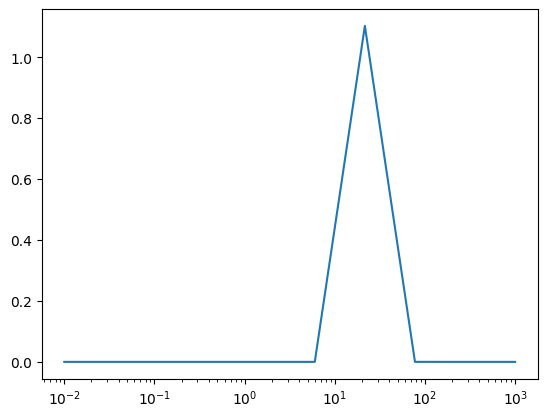

In [32]:
plt.plot(E,dRdE_Smeared)
plt.xscale('log')

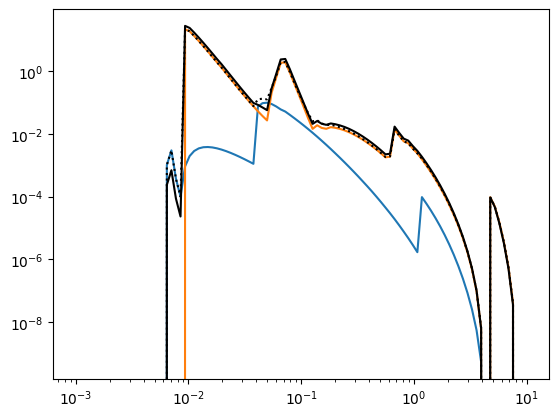

In [ ]:
fig, ax = plt.subplots()
ax.plot(E*1e-3, Minimal[0]*Efficiency*Resolution)
ax.plot(E*1e-3, Minimal[1]*Efficiency*Resolution)
ax.plot(E*1e-3,total*Efficiency*Resolution, linewidth=1.5, linestyle='dotted', color = 'black')
ax.plot(E*1e-3,detTrue, linewidth=1.5, color = 'Black')

ax.set_xscale('log')
ax.set_yscale('log')